### 

In [1]:
import numpy as np
import cv2
import matplotlib.pylab as plt

- OpenCV 설치
- !pip install opencv-python

# 1. 2차원 데이터 표현
### 데이터가 큰 경우에 파이썬의 리스트는 적합하지않다.

In [ ]:
a = [ [1,2,3], 
      [4,5,6]]
print(a)
print(a[1][2]) # a[1][2] = 20   #a[1,2]
print(a[1])

### 실질적으로 다차원 데이터를 표현할때에는 파이썬 표준 모듈을 사용한다. 넘파이로 2차원 데이터를 표현한다.
### numpy로하는게 수행속도가 매우 빠르다.

In [5]:
b = np.array([[1,2,3], 
       [4,5,6]])
print(b)

[[1 2 3]
 [4 5 6]]


In [6]:
print(b[1][2])

6


In [7]:
print(b[1,2])

6


### Shape은 행렬의 크기를 리턴해준다. 2by3행렬임을 알 수 있다.

### 튜플은 read only인 리스트 형태이다. 

In [9]:
print(b.shape)

(2, 3)


In [10]:
print(b.shape[0], b.shape[1])

2 3


In [11]:
d = (10, 30)
print(d[0])

10


# 2. Gray 영상
### 그레이스케일 할때에는 반드시 cmap(colorMap)을 'gray'로 설정해 주어야 한다.

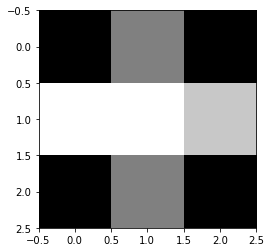

In [12]:
gray = np.array([[0,128,0],
                [255,255,200],
                 [0,128,0]] )
plt.imshow(gray, cmap='gray')

### 기본적으로는 밝기값을 구분할 수 없기 때문에 밝기를 조절할 수 있는 컬러영상으로 출력이 된다. 

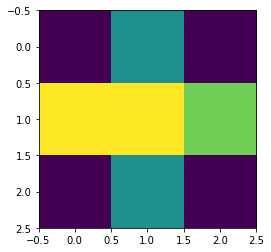

In [13]:
plt.imshow(gray)

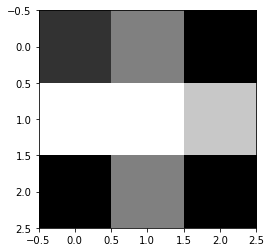

In [22]:
gray[0,0] = 50
plt.imshow(gray, cmap='gray')

### : 클론은 모든행과 모든 컬럼을 뜻하며, [:,:]=128은 모든값을 128로 바꾸라는 뜻이다.
### subplot은 한 창에 모든 이미지를 출력하고자 할 때 사용한다. 
### 첫번째 이미지가 검은 이유는, 128한가지 색밖에 없기때문에 그냥 다 어두운 색으로 표시한다.
### 이를 잘 나오게 하기 위해서는 vmin과 vmax를 사용한다. 가장 작은값은0, 가장 큰 값은 255로 한다.

[[128 128 128]
 [128 128 128]
 [128 128 128]]


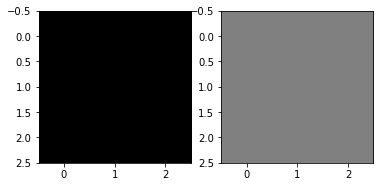

In [23]:
gray[:, :] = 128
print(gray)
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)

# 3. Color 이미지
### 2by4by3에서 모든 픽셀을 0으로로 초기화 한다.

In [24]:
color = np.zeros((2,4,3))
print(color.shape)

(2, 4, 3)


### 기본적으로 OpenCV는 BGR로 구성됨으로 알고있는데 왜 RGB로 값이 나오나?

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


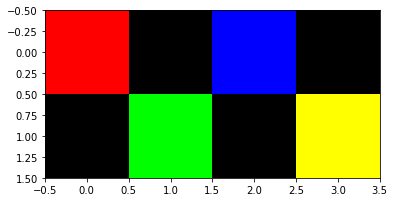

In [32]:
color[0,0] = [255,0,0] #color[0,0,:] = [255,0,0]
#color[0,0,0] = 255
#color[0,0,1] = 0
#color[0,0,2] = 0
color[1,1] = [0,255,0]
color[0,2] = [0,0,255]
color[1,3] = [255,255,0]

plt.imshow(color)

### 전체 영상에서 0번째 채널만 가져온다. Height,Weight, Channel 이니까 그렇다.
### 빨간색 채널만가져와서 그레이 스케일로 표현하니 기존 0,0과 1,3만 밝은값이 나온다

[[255.   0.   0.   0.]
 [  0.   0.   0. 255.]]


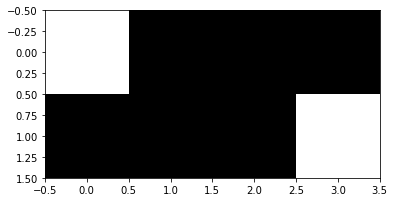

In [34]:
R = color[:,:,0]
print(R)
plt.imshow(R, cmap='gray')

# 4. 데이터 타입
### 기본적으로 int32이지만 진짜 32bit처럼 입력하면 에러가 뜰 위험이있다.

int32


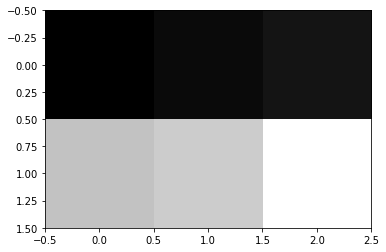

In [35]:
a = np.array([[10,20,30],
              [200,210,260]  ])
print(a.dtype)
plt.imshow(a, cmap='gray')

### 그래서 명시적으로 dateType을 uint8로 해줌으로써 Max값을 255로 설정해줘야 안전하다.

uint8


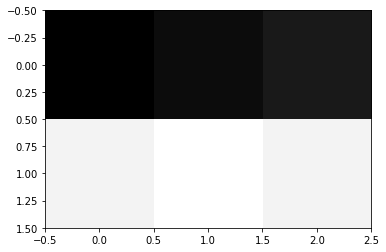

In [36]:
a = np.array([[10,20,30],
              [200,210,200]  ], dtype='uint8')
print(a.dtype)
plt.imshow(a, cmap='gray')

### 모든원소중 하나라도 실수이면 플롯형태가 된다. 255라고 하더라고 0~1사이의 형태로 정규화되어도 잘 출력이 된다.

float64
[[0.03921569 0.07843137 0.11764706]
 [0.78431373 0.82352941 0.78431373]]


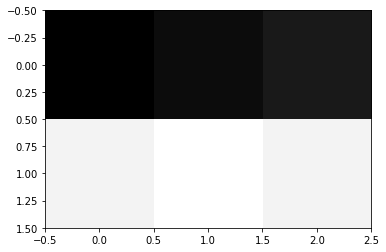

In [38]:
a = np.array([[10.0,20,30],
              [200,210,200]  ]) / 255
print(a.dtype)
print(a)
plt.imshow(a, cmap='gray')

# 5. OpenCV 기반 영상 읽기

### OpenCV는 기본적으로 BGR로 되어있기 떄문에 다시 맞춰줄 필요가 있다.

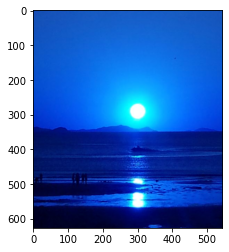

In [39]:
img = cv2.imread('sunset.jpg')
plt.imshow(img)

In [40]:
print(img.shape)

(627, 545, 3)


### plot함수로 출력할때에는 RGB이지만, OpenCV는 BGR이다.

In [41]:
img2 = img.copy()  # img2 = img
img2[:,:,0] = img[:,:,2]
img2[:,:,2] = img[:,:,0]

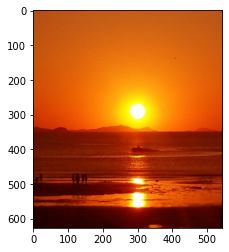

In [42]:
plt.imshow(img2)

### 임의적으로 설정해 채널을 0채널로 만들 수 있다.

(627, 545)


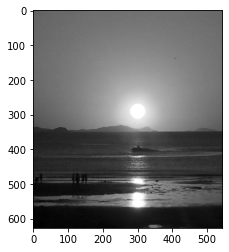

In [45]:
img = cv2.imread('sunset.jpg', 0)
print(img.shape)
plt.imshow(img, cmap='gray')

In [47]:
def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()   

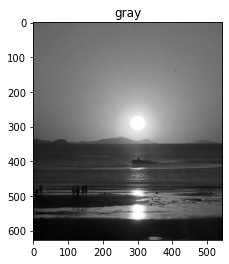

In [48]:
img = cv2.imread('sunset.jpg', 0)
imshow("gray", img)

In [61]:
img = cv2.imread('sunset.jpg')
print(img.shape)

R = np.zeros(img.shape, img.dtype)
G = np.zeros(img.shape, img.dtype)
B = np.zeros(img.shape, img.dtype)

(627, 545, 3)


In [62]:
print(R.shape)

(627, 545, 3)


In [63]:
R[:,:,0] = img[:,:,2]
G[:,:,1] = img[:,:,1]
B[:,:,2] = img[:,:,0]

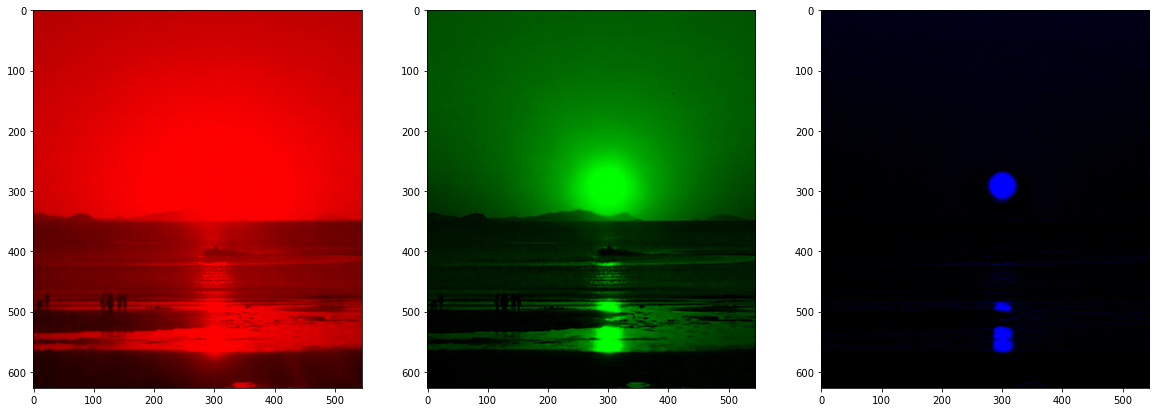

In [64]:
plt.figure(figsize=(20, 10))  #가로 세로 인치
plt.subplot(1,3,1)
plt.imshow(R)
plt.subplot(1,3,2)
plt.imshow(G)
plt.subplot(1,3,3)
plt.imshow(B)

# 6.  OpenCV 기반 영상 출력
### 지금까지는 plt로 이미지를 주피터 내에서 출력하였지만 cv2기반으로 출력하면 새로운 창이 뜨며 이미지가 출력된다.

In [65]:
cv2.imshow('image', img)
cv2.waitKey()
cv2.destroyAllWindows()

# 7. Color 영상 처리

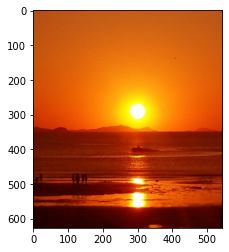

In [78]:
img = cv2.imread('sunset.jpg')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### 굳이 채널까지 받을필요는 없으므로 under bar로 생략해줄 수 있다.
### for문으로 모든 픽셀을 가져온다. 
### 조건문의 해당색깔범위에 있으면 검정색으로 출력한다.

In [ ]:
height, width, _ = img.shape
    
for h in range(0, height):
        for w in range(0, width):
            b = img[h, w, 0]
            g = img[h, w, 1]
            r = img[h, w, 2]    
            
            if ( b > 50 and b < 70) and ( g > 150 and g < 200) and ( r > 30 and r < 60)   :
            #if ( g > 165 and g < 170 ) :
                img[h, w, :] = 0
                
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))                

# 2주차 과제

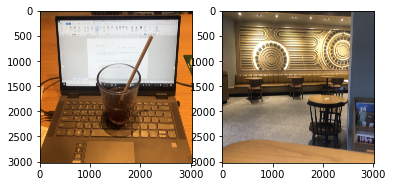

In [81]:
img = cv2.imread('caffee.jpg')
img2 = cv2.imread('caffee2.jpg')
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

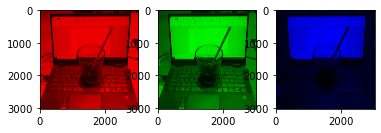

In [83]:
R = np.zeros(img.shape, img.dtype)
G = np.zeros(img.shape, img.dtype)
B = np.zeros(img.shape, img.dtype)

R[:,:,0] = img[:,:,2]
G[:,:,1] = img[:,:,1]
B[:,:,2] = img[:,:,0]

plt.subplot(1,3,1)
plt.imshow(R)
plt.subplot(1,3,2)
plt.imshow(G)
plt.subplot(1,3,3)
plt.imshow(B)

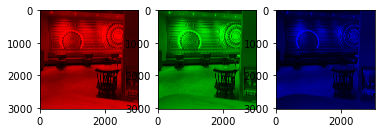

In [84]:
R = np.zeros(img.shape, img2.dtype)
G = np.zeros(img.shape, img2.dtype)
B = np.zeros(img.shape, img2.dtype)

R[:,:,0] = img2[:,:,2]
G[:,:,1] = img2[:,:,1]
B[:,:,2] = img2[:,:,0]

plt.subplot(1,3,1)
plt.imshow(R)
plt.subplot(1,3,2)
plt.imshow(G)
plt.subplot(1,3,3)
plt.imshow(B)